In [5]:
# 操作 browser 的 API
from selenium import webdriver

# 處理逾時例外的工具
from selenium.common.exceptions import TimeoutException

# 面對動態網頁，等待某個元素出現的工具，通常與 exptected_conditions 搭配
from selenium.webdriver.support.ui import WebDriverWait

# 搭配 WebDriverWait 使用，對元素狀態的一種期待條件，若條件發生，則等待結束，往下一行執行
from selenium.webdriver.support import expected_conditions as EC

# 期待元素出現要透過什麼方式指定，通常與 EC、WebDriverWait 一起使用
from selenium.webdriver.common.by import By

# 強制等待 (執行期間休息一下)
from time import sleep

# 執行 command 的時候用的 
import os

# 處理下拉式選單的工具
from selenium.webdriver.support.ui import Select
from selenium.webdriver.chrome.service import Service
import requests, json
import os, csv, re
import pandas as pd
import numpy as np

# 處理下拉式選單的工具
from selenium.webdriver.support.ui import Select

company_name_1    0
company_name_2    0
person_name       0
position          2
dtype: int64
2
%%%%%%%%%
2
row_i:0
中國石油化工
@@@@@@@@@@@@@
11
张玉卓,马永生,陈月明
中國石油化工_张玉卓
######
csv第 0 列
csv第 0 列的第 0 個
csv第 0 列
csv第 0 列的第 0 個
/////////////
中國石油化工_马永生
######
csv第 0 列
csv第 0 列的第 1 個
csv第 0 列
csv第 0 列的第 1 個
csv第 0 列
csv第 0 列的第 1 個
csv第 0 列
csv第 0 列的第 1 個
/////////////
中國石油化工_陈月明
######
csv第 0 列
csv第 0 列的第 2 個
csv第 0 列
csv第 0 列的第 2 個
csv第 0 列
csv第 0 列的第 2 個
csv第 0 列
csv第 0 列的第 2 個
/////////////
row_i:1
中國石油天然氣
@@@@@@@@@@@@@
10
戴厚良,章建华,黄龙
中國石油天然氣_戴厚良
######
csv第 1 列
csv第 1 列的第 0 個
csv第 1 列
csv第 1 列的第 0 個
/////////////
中國石油天然氣_章建华
######
csv第 1 列
csv第 1 列的第 1 個
csv第 1 列
csv第 1 列的第 1 個
/////////////
中國石油天然氣_黄龙
######
csv第 1 列
csv第 1 列的第 2 個
csv第 1 列
csv第 1 列的第 2 個
csv第 1 列
csv第 1 列的第 2 個
csv第 1 列
csv第 1 列的第 2 個
/////////////
!!!!!!!!!
listLink:[{'name': '中國石油化工_张玉卓_1', 'link': 'https://img2.baidu.com/it/u=3658110190,2280270843&fm=253&fmt=auto&app=138&f=JPEG?w=640&h=464', 'title': '张玉卓来胜利油田调研,对百年胜利提出新要
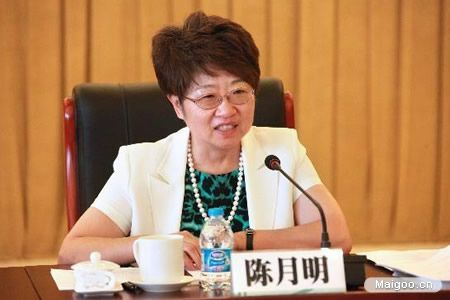
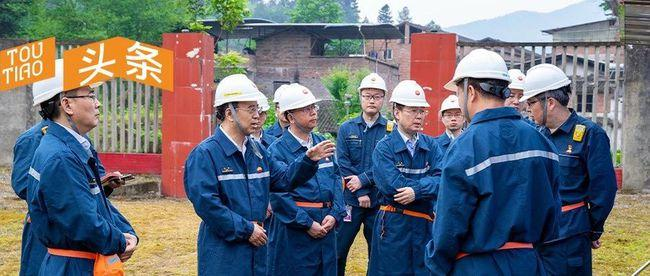
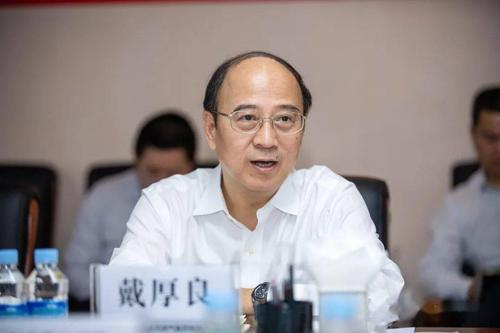

In [14]:
# 啟動瀏覽器工具的選項
options = webdriver.ChromeOptions()
# options.add_argument("--headless")                #不開啟實體瀏覽器背景執行
options.add_argument("--start-maximized")         #最大化視窗
options.add_argument("--incognito")               #開啟無痕模式
options.add_argument("--disable-popup-blocking ") #禁用彈出攔截

executable_path = Service('./chromedriver.exe')

# 啟動driver
driver = webdriver.Chrome( 
    options = options, 
    service = executable_path
)

photolimit=3  # 要存幾張照片
listLink=[]

data=pd.read_csv(r'dataOriginalCsv/china500nameList_ftest.csv',encoding='utf-8')

print(data.isnull().sum()) # 查詢缺失值
print(len(data))

#data=data1.dropna(subset=['person_name']) 
data = data.fillna("None") 

print("%%%%%%%%%")
print(len(data))

df1 = data['company_name_1']
df2 = data['person_name']

# print(len(df1))
# print(df1)
# print(len(df1))
# print("=============")
# print(df2)
# print(len(df2))

#百度下載圖片(台灣上市上櫃公司)
def visit():
    # 前往指定連結 如果只用百度網址會出現  Message: element not interactable 參考 https://blog.csdn.net/gufenchen/article/details/90274169
    driver.get('https://image.baidu.com/search/index?tn=baiduimage&ipn=r&ct=201326592&cl=2&lm=-1&st=-1&fm=result&fr=&sf=1&fmq=1643049528175_R&pv=&ic=0&nc=1&z=&hd=&latest=&copyright=&se=1&showtab=0&fb=0&width=&height=&face=0&istype=2&dyTabStr=&ie=utf-8&sid=&word=222') 
    
    global row_i,row_j
       
    for row_i in range(len(df2)):
        print("row_i:{}".format(row_i))
        print(df1[row_i])
        print("@@@@@@@@@@@@@")
        print(len(df2[row_i]))
        print(df2[row_i])
        str2 = df2[row_i].split(',')
#     print(len(str2))    

        # 跑共每列共幾行的迴圈
        for row_j in range(len(str2)):
#         print(str2[j])
            findStr=df1[row_i]+'_'+str2[row_j]   # 公司名+人名
            print(findStr)
            search(findStr)      
    
def search(findStr):
    driver.find_element(By.CSS_SELECTOR, "input#kw").clear()  # 清空輸入區
    driver.find_element(By.CSS_SELECTOR, "input#kw").send_keys(findStr)   # 輸入公司名+人名
    sleep(2)
    driver.find_element(By.CSS_SELECTOR, "input.s_btn").click()  # 按下搜尋鍵
    sleep(2)
    
    print("######")
    #print(findStr)
    getUrl(findStr)
    sleep(2)
    driver.find_element(By.CSS_SELECTOR, "input#kw").clear()  # 清空輸入區
    sleep(2)
    ##print(listLink)
    print("/////////////")
    
def getUrl(findStr):
    # 取得主要元素的集合
    a_elms = driver.find_elements(By.CSS_SELECTOR, 'div.imgpage ul')

    # 同時印出索引和元素 非driver也可以find_elements
    for index, elem in enumerate(a_elms):
        imgs_src = elem.find_elements(By.CSS_SELECTOR, 'div.imgbox-border img')
        imgs_list = [m.get_attribute('src') for m in imgs_src]  # 將照片網址建成list
        title_txt = elem.find_elements(By.CSS_SELECTOR, 'a')
        title_list = [t.get_attribute('title') for t in title_txt]   # 將照片標題建成list
        count = 1
        #print(imgs_list)
        #print(title_list)
        print("csv第 {} 列".format(row_i))
        print("csv第 {} 列的第 {} 個".format(row_i,row_j))
        
        for index_j, elem in enumerate(imgs_list):

            # 轉成字典
            if index_j < photolimit:
                listLink.append({
                    'name':findStr+'_'+str(index_j+1),   # 要存成的照片檔名
                    'link':imgs_list[index_j],     # 存很多照片
                    'title':title_list[count]    # 在同一個名字
                    }) 
            else:
                break
            count+=1
    
def saveCsv():
    with open('chinaEntertainToPhotoURL.csv', 'a', newline='', encoding='utf-8') as f:
        print("!!!!!!!!!")
        print("listLink:{}".format(listLink))
        
       # r = csv.writer(f)

        for index,x in enumerate(listLink):
            r = csv.DictWriter(f,fieldnames=x.keys())
            ##print("$$$$$$$$")
            #print(index)
            ##print(i)
            if index == 0:
                r.writeheader()
                r.writerow(x)
            else:
                r.writerow(x)  
    
if __name__ == '__main__':
    visit()
    saveCsv()
    #download()

driver.quit()

In [ ]:
# 若跑名單時卡住，不要按restart，也不用跑這格cell
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from time import sleep
import json, csv
import urllib
import os
import pandas as pd

# 處理下拉式選單的工具
from selenium.webdriver.support.ui import Select

def download():
    folderPath = 'chinaEntertainPhoto'
    if not os.path.exists(folderPath):
        os.makedirs(folderPath)

    listResult=pd.read_csv(r'dataPause/chinaEntertainToPhotoURL.csv')
#     len(listResult)
 
    # 如果跑到一半斷掉 就從斷掉的地方開始
    #aa=listResult[:]
    print(len(listResult))

    for i in range(len(listResult)):
    ##for i in range(len(aa)):
        print(i)
        try:
            urllib.request.urlretrieve(listResult['link'][i], os.path.join(folderPath , listResult['name'][i]+'.jpg')) # listResult 變 aa
            #os.rename(os.path.join(os.path.dirname(folderPath , listResult['name'][i]+'.jpg'),os.path.pardir), listResult['name'][i]+i+'.jpg')
            
#             urllib.request.urlretrieve(listResult['link'][i+9916], os.path.join(folderPath , listResult['name'][i+9916]+'.jpg'))
            print(listResult['name'][i]+'.jpg 已下載')
#             print(listResult['name'][i+9916]+'.jpg 已下載')

        except urllib.error.HTTPError as exception:
            print(listResult['name'][i]+i+".jpg 無法下載")
#             print(listResult['name'][i+9916]+".jpg 無法下載")
            continue
    
        except TimeoutException as e:
            print(listResult['name'][i]+i+".jpg 超時")
#             print(listResult['name'][i+9916]+".jpg 超時")
            continue
    
        except Exception as e:
            continue
            
    print("done")
    
if __name__ == '__main__':
    download()    

In [ ]:
listResult=pd.read_csv(r'dataPause/chinaEntertainToPhotoURL.csv')
print(len(listResult))